## Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

# Здание 1

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### 1.1. разобьём данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. создадим архитектуру для этой задачи

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()

model.add(Dense(8, input_shape=(8, ), activation='relu', name='dense_1'))

model.add(Dense(8, activation='relu', name='dense_2'))

model.add(Dense(8, activation='relu', name='dense_3'))

#model.add(Dense(32, activation='relu', name='dense_4'))

#model.add(Dense(16, activation='relu', name='dense_5'))
#model.add(Dense(64, activation='relu', name='dense_4'))
model.add(Dense(1, activation='linear', name='dense_output'))
'''
model.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
'''

"\nmodel.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))\nmodel.add(Dense(64, activation='relu', name='dense_2'))\nmodel.add(Dense(1, activation='linear', name='dense_output'))\n"

#### 1.3. компилируем сеть

подберём нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
from keras.optimizers import Adam

opt = Adam(lr=0.00001)

model.compile(optimizer=opt, loss='mse', metrics='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_output (Dense)        (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### 1.4. обучим нейросеть

Выберите нужное количество эпох.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm_train = mms.fit_transform(X_train)
X_norm_test = mms.fit_transform(X_test)

model.fit(X_norm_train, y_train, validation_data=(X_norm_test, y_test), epochs=150)

Epoch 1/150
516/516 [==============================] - 2s 3ms/step - loss: 5.4662 - mae: 2.0337 - val_loss: 5.4001 - val_mae: 2.0245
Epoch 2/150
516/516 [==============================] - 1s 2ms/step - loss: 5.2761 - mae: 1.9861 - val_loss: 5.2006 - val_mae: 1.9741
Epoch 3/150
516/516 [==============================] - 1s 2ms/step - loss: 5.0881 - mae: 1.9376 - val_loss: 5.0033 - val_mae: 1.9233
Epoch 4/150
516/516 [==============================] - 1s 2ms/step - loss: 4.9070 - mae: 1.8899 - val_loss: 4.8104 - val_mae: 1.8725
Epoch 5/150
516/516 [==============================] - 1s 2ms/step - loss: 4.7314 - mae: 1.8423 - val_loss: 4.6205 - val_mae: 1.8208
Epoch 6/150
516/516 [==============================] - 1s 2ms/step - loss: 4.5543 - mae: 1.7935 - val_loss: 4.4311 - val_mae: 1.7679
Epoch 7/150
516/516 [==============================] - 2s 3ms/step - loss: 4.3728 - mae: 1.7420 - val_loss: 4.2399 - val_mae: 1.7129
Epoch 8/150
516/516 [==============================] - 1s 3ms/step - 

#### 1.5. сделаем вывод, хорошо ли модель обучается?

Если модель обучается плохо, можете внести изменения в работу.

#### 1.6. Сделаем  предсказания на тестовых данных

In [ ]:
print(model.predict(X_norm_test))

129/129 [==============================] - 0s 1ms/step
[[2.0735815]
 [2.783312 ]
 [2.0178747]
 ...
 [1.0781436]
 [2.5433729]
 [2.2876968]]


#### 1.7. посчитаем метрику качества на тестовых данных

In [ ]:
mse_nn, mae_nn = model.evaluate(X_norm_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

129/129 [==============================] - 0s 1ms/step - loss: 0.6299 - mae: 0.5866
Mean squared error on test data:  0.6299435496330261
Mean absolute error on test data:  0.5866469144821167


# Здание 2

In [224]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [225]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [226]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [227]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Dataset")))

random.shuffle(imagePaths)

In [229]:
# цикл по изображениям
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (32, 32)).flatten() 
	data.append(image) 

	label = imagePath.split(os.path.sep)[-2] 	
	labels.append(label) 

In [230]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [231]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [232]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [233]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [234]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

In [235]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [236]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=1000)

Epoch 1/80
4/4 [==============================] - 3s 618ms/step - loss: 1.0938 - accuracy: 0.3656 - val_loss: 1.0785 - val_accuracy: 0.4183
Epoch 2/80
4/4 [==============================] - 2s 480ms/step - loss: 1.0563 - accuracy: 0.4396 - val_loss: 1.0686 - val_accuracy: 0.4010
Epoch 3/80
4/4 [==============================] - 1s 301ms/step - loss: 1.0827 - accuracy: 0.4022 - val_loss: 1.0854 - val_accuracy: 0.3803
Epoch 4/80
4/4 [==============================] - 1s 298ms/step - loss: 1.0554 - accuracy: 0.4120 - val_loss: 1.0265 - val_accuracy: 0.4685
Epoch 5/80
4/4 [==============================] - 1s 348ms/step - loss: 1.0167 - accuracy: 0.4641 - val_loss: 1.0441 - val_accuracy: 0.4226
Epoch 6/80
4/4 [==============================] - 1s 348ms/step - loss: 1.0246 - accuracy: 0.4520 - val_loss: 1.0287 - val_accuracy: 0.4468
Epoch 7/80
4/4 [==============================] - 1s 343ms/step - loss: 1.0276 - accuracy: 0.4408 - val_loss: 1.0278 - val_accuracy: 0.4572
Epoch 8/80
4/4 [====

In [237]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
37/37 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         cat       0.59      0.62      0.61       382
         dog       0.56      0.41      0.47       384
       horse       0.66      0.81      0.73       391

    accuracy                           0.61      1157
   macro avg       0.61      0.61      0.60      1157
weighted avg       0.61      0.61      0.60      1157



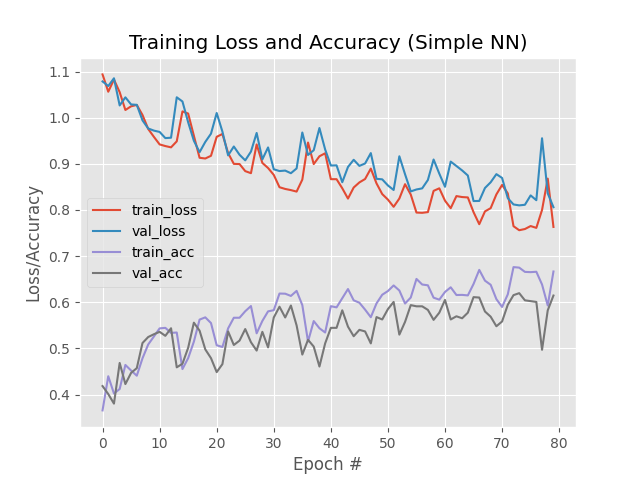

In [238]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

In [239]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


In [240]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving horse-59.jpg to horse-59.jpg


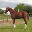

In [241]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [242]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [243]:
# загружаем модель и бинаризатор меток
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [244]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 61ms/step
[[0.03440936 0.06594458 0.899646  ]]


In [246]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [247]:
# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[221, 216, 215],
        [220, 215, 214],
        [218, 213, 212],
        ...,
        [242, 244, 244],
        [242, 244, 244],
        [242, 244, 244]],

       [[222, 217, 216],
        [221, 216, 215],
        [219, 214, 213],
        ...,
        [242, 244, 244],
        [242, 244, 244],
        [242, 244, 244]],

       [[226, 218, 218],
        [225, 217, 217],
        [223, 215, 215],
        ...,
        [243, 245, 245],
        [243, 245, 245],
        [243, 245, 245]],

       ...,

       [[ 63, 138, 136],
        [ 66, 141, 139],
        [ 69, 144, 142],
        ...,
        [ 53, 134, 125],
        [ 58, 139, 130],
        [ 48, 128, 121]],

       [[ 86, 156, 155],
        [ 71, 141, 140],
        [ 67, 141, 137],
        ...,
        [ 52, 130, 123],
        [ 68, 146, 139],
        [ 46, 120, 114]],

       [[ 88, 156, 155],
        [ 73, 141, 140],
        [ 69, 140, 137],
        ...,
        [ 50, 128, 121],
        [ 67, 144, 137],
        [ 82, 153, 150]]

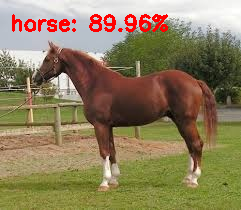

In [248]:
# показываем выходное изображение
cv2_imshow(output)